## Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer first applies for a home loan after which company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers.

## Dataset Column Description:

1. Loan_ID: a unique identifier for each loan application
2. Gender: the gender of the applicant (male or female)
3. Married: whether the applicant is married or not (yes or no)
4. Dependents: the number of dependents the applicant has (0, 1, 2, or 3+)
5. Education: the education level of the applicant (graduate or not)
6. Self_Employed: whether the applicant is self-employed or not (yes or no)
7. ApplicantIncome: the income of the applicant
8. CoapplicantIncome: the income of the co-applicant (if any)
9. LoanAmount: the amount of the loan requested
10. Loan_Amount_Term: the term of the loan in months
11. Credit_History: a binary variable indicating whether the applicant has a credit history or not (1 = has credit history, 0 = no credit history)
12. Property_Area: the area where the property associated with the loan is located (urban, suburban, or rural)
13. Loan_Status: whether the loan application was approved or denied (Y = approved, N = denied)



In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Gathering Data

In [2]:
# loading the dataset
loan_train = pd.read_csv('loan-train.csv')
loan_test = pd.read_csv('loan-test.csv')

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(loan_train.columns)
print(loan_test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


loan_train contains all the independent variables and the target variable 'Loan_Status' and will be used for training the model while loan_test contains all the independent variables, but not the target variable. The model that will be created will be used to predict the target variable for the test data.

In [6]:
# making a copy of the datasets so that the original datasets are not lost when changes are made
train_original=loan_train.copy()
test_original=loan_test.copy()

In [7]:
print(loan_train.shape)
print(loan_test.shape)

(614, 13)
(367, 12)


In [8]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Exploratory Data Analysis

In [11]:
loan_train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

About 69% of the total loans were approved

Y    422
N    192
Name: Loan_Status, dtype: int64


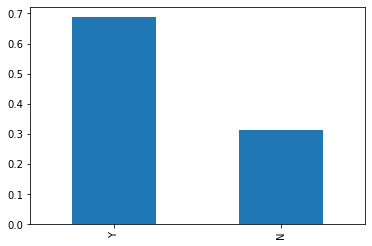

In [12]:
print(loan_train['Loan_Status'].value_counts())

loan_train['Loan_Status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [13]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

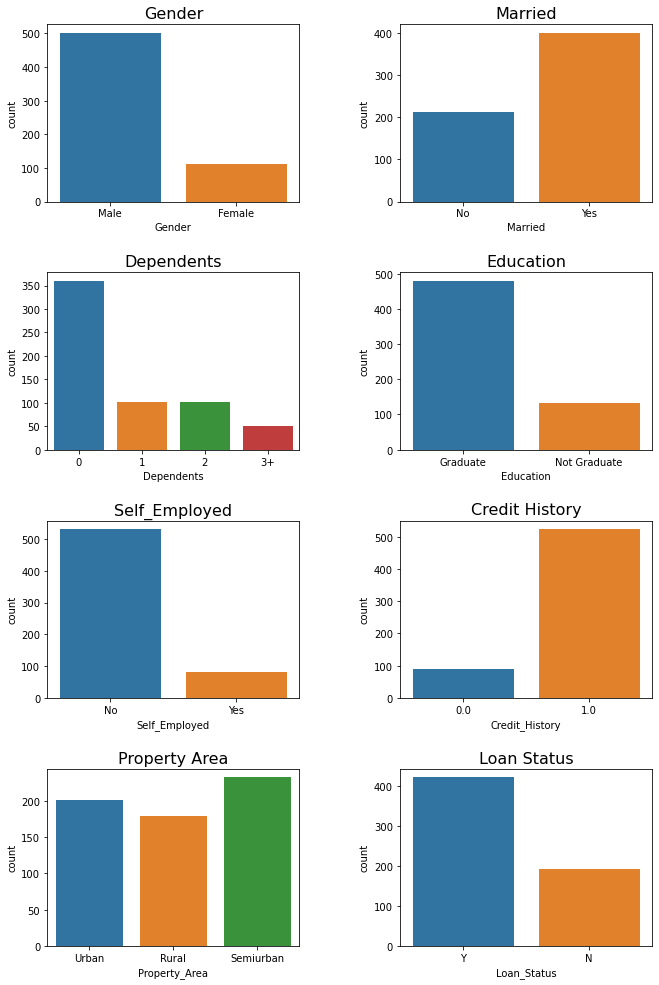

In [100]:
fig, ax = plt.subplots(4, 2, figsize=(12,16))

sns.countplot(ax=ax[0,0], x='Gender', data=loan_train)
ax[0,0].set_title('Gender', fontsize=16)

sns.countplot(ax=ax[0,1], x='Married', data=loan_train)
ax[0,1].set_title('Married', fontsize=16)

sns.countplot(ax=ax[1,0],  x='Dependents', data=loan_train)
ax[1,0].set_title('Dependents', fontsize=16)

sns.countplot(ax=ax[1,1], x='Education', data=loan_train)
ax[1,1].set_title('Education', fontsize=16)

sns.countplot(ax=ax[2,0], x='Self_Employed', data=loan_train)
ax[2,0].set_title('Self_Employed', fontsize=16)

sns.countplot(ax=ax[2,1], x='Credit_History', data=loan_train)
ax[2,1].set_title('Credit History', fontsize=16)

sns.countplot(ax=ax[3,0], x='Property_Area', data=loan_train)
ax[3,0].set_title('Property Area', fontsize=16)

sns.countplot(ax=ax[3,1], x='Loan_Status', data=loan_train)
ax[3,1].set_title('Loan Status', fontsize=16)

plt.subplots_adjust(left=0.2, bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

In [15]:
pd.crosstab(loan_train['Gender'], loan_train['Loan_Status'], margins=True)


Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


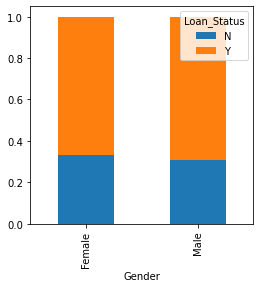

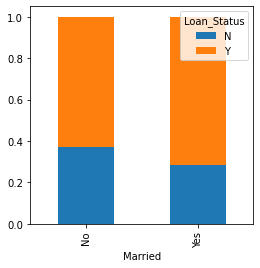

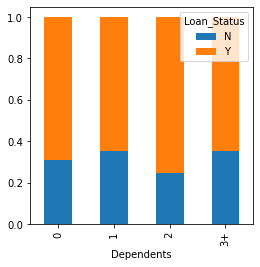

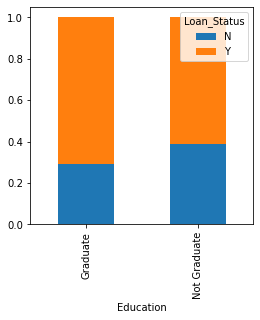

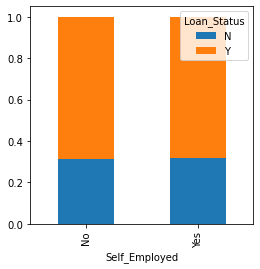

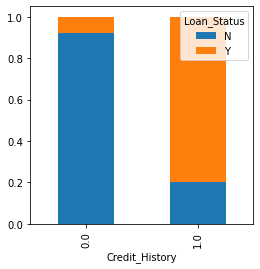

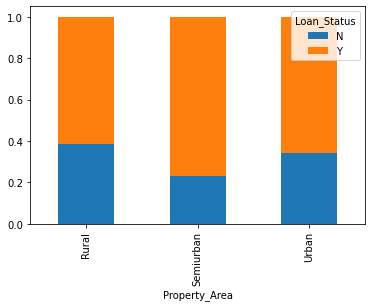

In [17]:
# visualizing the relationsip betweeen features and target variable

Gender=pd.crosstab(loan_train['Gender'], loan_train['Loan_Status'])
Married=pd.crosstab(loan_train['Married'], loan_train['Loan_Status'])
Dependents=pd.crosstab(loan_train['Dependents'], loan_train['Loan_Status'])
Education=pd.crosstab(loan_train['Education'], loan_train['Loan_Status'])
Self_Employed=pd.crosstab(loan_train['Self_Employed'], loan_train['Loan_Status'])
Credit_History=pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
Property_Area=pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

plt.show()

The following inferences can be made form the visualization:
1. Married applicants are more likely to have their loans approved. 
2. Graduates seem to have a greater chance of receving loan. 
3. Applicants having credit history of 1 have a higher chance of getting loan.
4. Applicants in Semiurban area have higher chances of getting a loan.


In [18]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

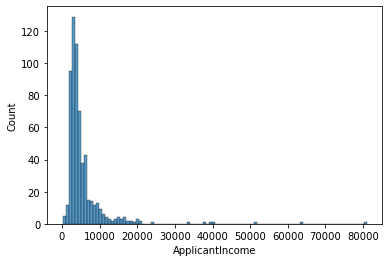

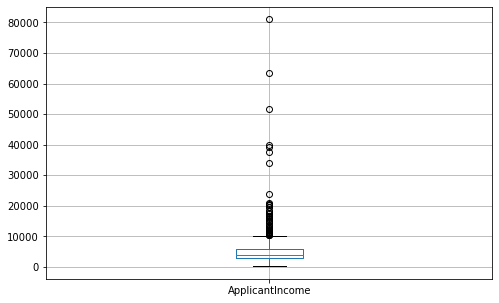

In [19]:
sns.histplot(loan_train['ApplicantIncome'], bins=100)
plt.show()

loan_train.boxplot('ApplicantIncome', figsize=(8,5))
plt.show()

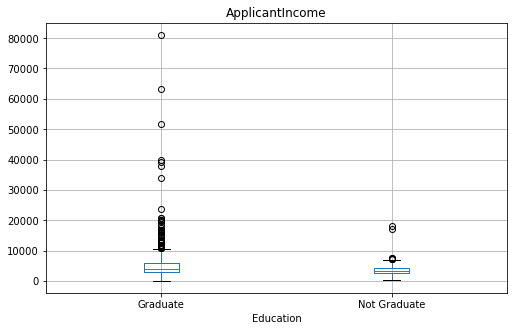

In [20]:
loan_train.boxplot(column='ApplicantIncome', by = 'Education', figsize=(8,5)) 
plt.suptitle('')
plt.show()

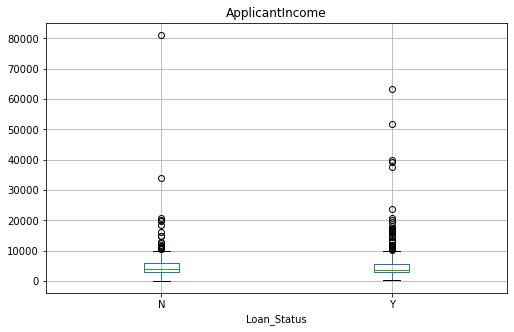

In [21]:
loan_train.boxplot(column='ApplicantIncome', by = 'Loan_Status', figsize=(8,5)) 
plt.suptitle('')
plt.show()

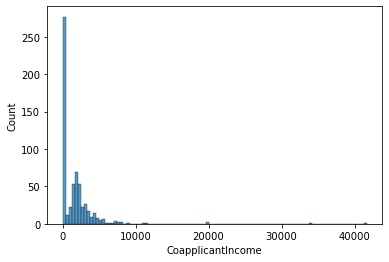

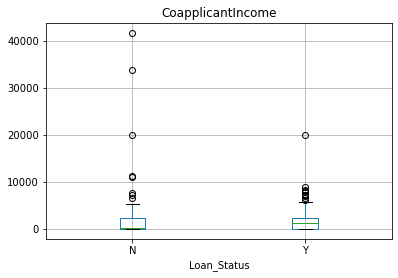

In [22]:
sns.histplot(loan_train['CoapplicantIncome'], bins=100)
plt.show()

loan_train.boxplot('CoapplicantIncome', by='Loan_Status')
plt.suptitle('')
plt.show()

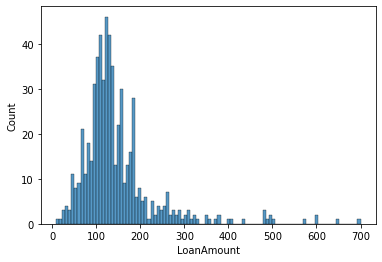

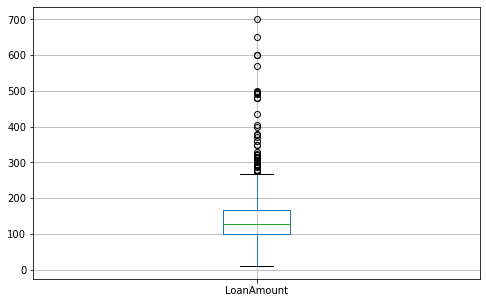

In [23]:
sns.histplot(loan_train['LoanAmount'], bins=100)
plt.show()

loan_train.boxplot('LoanAmount', figsize=(8,5))
plt.show()

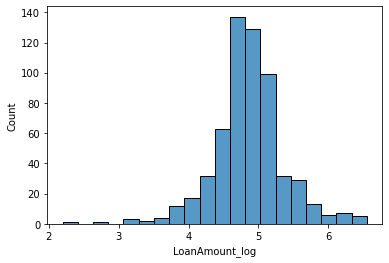

In [24]:
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount'])

sns.histplot(loan_train['LoanAmount_log'], bins=20)
plt.show()

In [25]:
# checking for missing values
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [26]:
loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
# dealing with missing values in categorical variables
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)

In [28]:
# dealing with missing values in numerical variables
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)
loan_train['LoanAmount_log'].fillna(loan_train['LoanAmount_log'].mean(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

In [29]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [30]:
loan_train['TotalIncome'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']

loan_train['TotalIncome_log'] = np.log(loan_train['TotalIncome'])

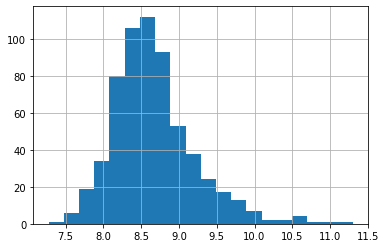

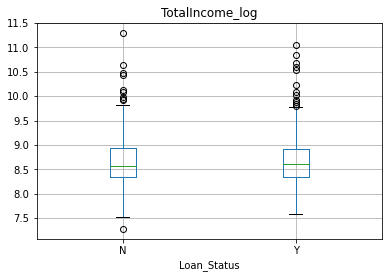

In [31]:
loan_train['TotalIncome_log'].hist(bins=20)

loan_train.boxplot('TotalIncome_log', by='Loan_Status')
plt.suptitle('')
plt.show()

## Training the Model

In [32]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [33]:
features = ['Married','Dependents','Education','Credit_History','Property_Area','LoanAmount_log','TotalIncome_log']
# target = Loan_Status

In [34]:
x = loan_train[features]
y = loan_train['Loan_Status'].values

In [35]:
x

,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,No,0,Graduate,1.0,Urban,4.857444,8.674026
1,Yes,1,Graduate,1.0,Rural,4.852030,8.714568
2,Yes,0,Graduate,1.0,Urban,4.189655,8.006368
3,Yes,0,Not Graduate,1.0,Urban,4.787492,8.505323
4,No,0,Graduate,1.0,Urban,4.948760,8.699515
...,...,...,...,...,...,...,...
609,No,0,Graduate,1.0,Rural,4.262680,7.972466
610,Yes,3+,Graduate,1.0,Rural,3.688879,8.320205
611,Yes,1,Graduate,1.0,Urban,5.533389,9.025456
612,Yes,2,Graduate,1.0,Urban,5.231109,8.933664


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
le = LabelEncoder()

In [37]:
x.iloc[:,[0,1,2,4]] = x.iloc[:,[0,1,2,4]].apply(le.fit_transform)

In [38]:
x.head()

,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,0,0,0,1.0,2,4.857444,8.674026
1,1,1,0,1.0,0,4.852030,8.714568
2,1,0,0,1.0,2,4.189655,8.006368
3,1,0,1,1.0,2,4.787492,8.505323
4,0,0,0,1.0,2,4.948760,8.699515


In [39]:
y = le.fit_transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [93]:
x_train.head()

,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
320,1,0,0,1.0,1,4.744932,8.426612
390,0,3,0,1.0,0,5.220356,9.123365
578,1,1,0,1.0,0,4.672829,8.297544
591,1,2,0,1.0,1,5.323010,8.699515
541,0,0,0,0.0,1,4.595120,7.667626


In [94]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [95]:
y_pred = model.predict(x_test)

In [96]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [97]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8292682926829268

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.51      0.66        39
           1       0.81      0.98      0.89        84

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



### Predicting which customers are eligible for loan with the loan test dataset

In [46]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

In [48]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [49]:
loan_test['LoanAmount_log'] = np.log(loan_test['LoanAmount'])

In [50]:
loan_test['TotalIncome'] = loan_test['ApplicantIncome'] + loan_test['CoapplicantIncome']

loan_test['TotalIncome_log'] = np.log(loan_test['TotalIncome'])

In [51]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [52]:
test = loan_test[features]
test

,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,Yes,0,Graduate,1.0,Urban,4.700480,8.651724
1,Yes,1,Graduate,1.0,Urban,4.836282,8.428581
2,Yes,2,Graduate,1.0,Urban,5.337538,8.824678
3,Yes,2,Graduate,1.0,Urban,4.605170,8.494129
4,No,0,Not Graduate,1.0,Urban,4.356709,8.094378
...,...,...,...,...,...,...,...
362,Yes,3+,Not Graduate,1.0,Urban,4.727388,8.663196
363,Yes,0,Graduate,1.0,Urban,4.744932,8.490233
364,No,0,Graduate,1.0,Semiurban,4.836282,8.564649
365,Yes,0,Graduate,1.0,Rural,5.062595,8.908289


In [53]:
test.iloc[:,[0,1,2,4]] = test.iloc[:,[0,1,2,4]].apply(le.fit_transform)

In [54]:
test.head()

,Married,Dependents,Education,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,1,0,0,1.0,2,4.700480,8.651724
1,1,1,0,1.0,2,4.836282,8.428581
2,1,2,0,1.0,2,5.337538,8.824678
3,1,2,0,1.0,2,4.605170,8.494129
4,0,0,1,1.0,2,4.356709,8.094378


In [55]:
pred = model.predict(test)

In [56]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

1 means the customer is eligible for a loan, 0 means the customer is not eligible.

In [57]:
final_data = loan_test[['Loan_ID']]
final_data.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [58]:
final_data['Loan_Status']=pred
final_data.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [59]:
final_data['Loan_Status'].replace([0,1], ['N','Y'], inplace=True)
final_data.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
